In [32]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Zara_sales_EDA.csv',delimiter=';')

In [3]:
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.describe()

,Product ID,Sales Volume,price
count,20252.000000,20252.000000,20252.000000
mean,208931.432303,1097.400454,41.949061
std,8961.076507,298.234609,23.380960
min,110075.000000,518.000000,12.000000
25%,204442.750000,849.000000,23.950000
50%,209505.500000,990.000000,35.950000
75%,214568.250000,1364.250000,53.950000
max,219631.000000,1940.000000,134.990000


In [6]:
print(df.dtypes)
print(df.shape)

Product ID            int64
Product Position     object
Promotion            object
Product Category     object
Seasonal             object
Sales Volume          int64
brand                object
url                  object
name                 object
description          object
price               float64
currency             object
terms                object
section              object
season               object
material             object
origin               object
dtype: object
(20252, 17)


In [7]:
# Functions 

# clean columns name
def clean_columns(df: pd.DataFrame):
    new_cols = [str.lower(str.replace(col,' ','_')) for col in df.columns]
    for idx,col in enumerate(df.columns):
        df = df.rename(columns={col:new_cols[idx]})
    
    return df


In [8]:
df = clean_columns(df)
df.head(5)

,product_id,product_position,promotion,product_category,seasonal,sales_volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China


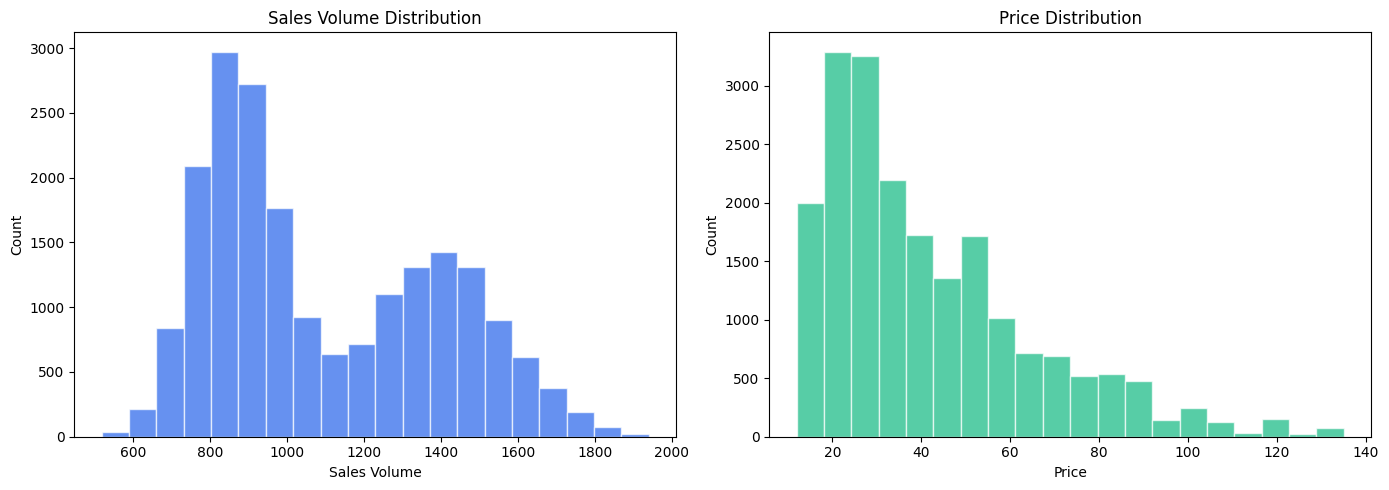

In [9]:
import matplotlib.pyplot as plt

num_cols = ["sales_volume", "price"]
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # wider, not taller

colors = ['#2563eb', '#10b981']

for i, col in enumerate(num_cols):
    ax = axes[i]
    
    df[col].plot.hist(bins=20, ax=ax, alpha=0.7, color=colors[i], edgecolor='white')
    
    ax.set_xlabel(col.replace("_", " ").title())
    ax.set_ylabel("Count")
    ax.set_title(f"{col.replace('_', ' ').title()} Distribution")

plt.tight_layout()
plt.show()

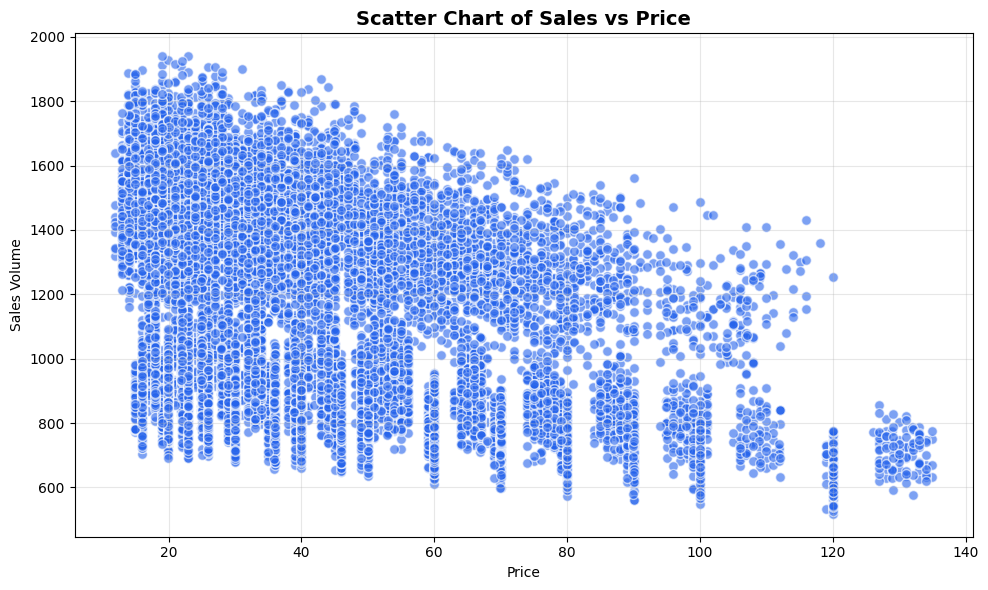

In [37]:
import matplotlib.pyplot as plt

# Option 1: Simple color + styling
fig, ax = plt.subplots(figsize=(10, 6))
df.plot.scatter(x="price", y="sales_volume", ax=ax, 
                color='#2563eb', alpha=0.6, s=50, edgecolor='white')
ax.set_title("Scatter Chart of Sales vs Price", fontsize=14, fontweight='bold')
ax.set_xlabel("Price")
ax.set_ylabel("Sales Volume")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

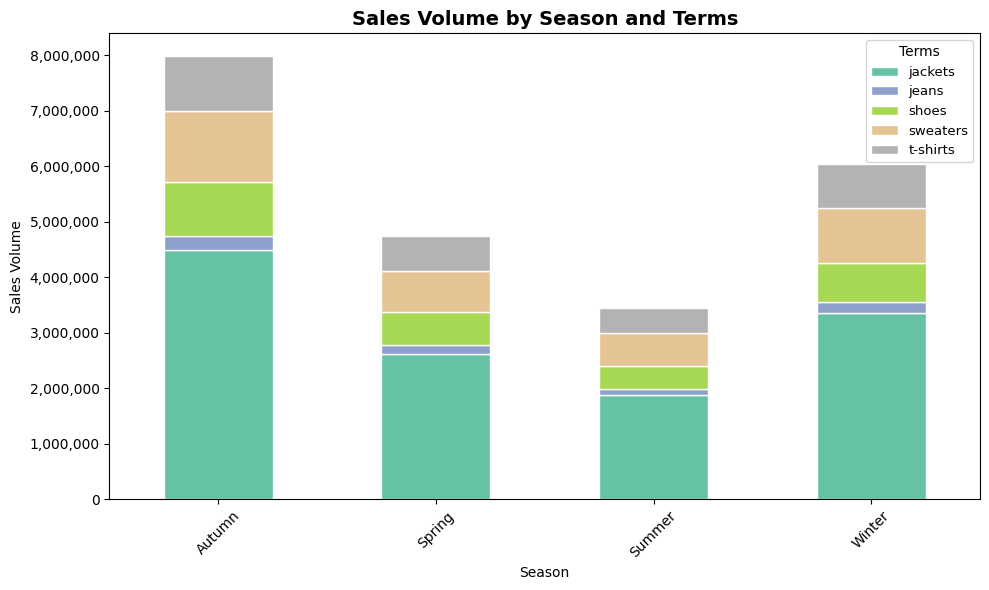

In [39]:

df_group = df.groupby(["season", "terms"]).agg({"sales_volume": "sum"})
df_pivot = df_group.unstack("terms")
df_pivot.columns = df_pivot.columns.droplevel(0)

ax = df_pivot.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set2", edgecolor="white")

plt.title("Sales Volume by Season and Terms", fontsize=14, fontweight="bold")
plt.xlabel("Season")
plt.ylabel("Sales Volume")
plt.legend(title="Terms", loc="upper right",fontsize=9.5)  # Move legend
ax.ticklabel_format(style='plain', axis='y')  # Remove scientific notation
ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))  # Add commas

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

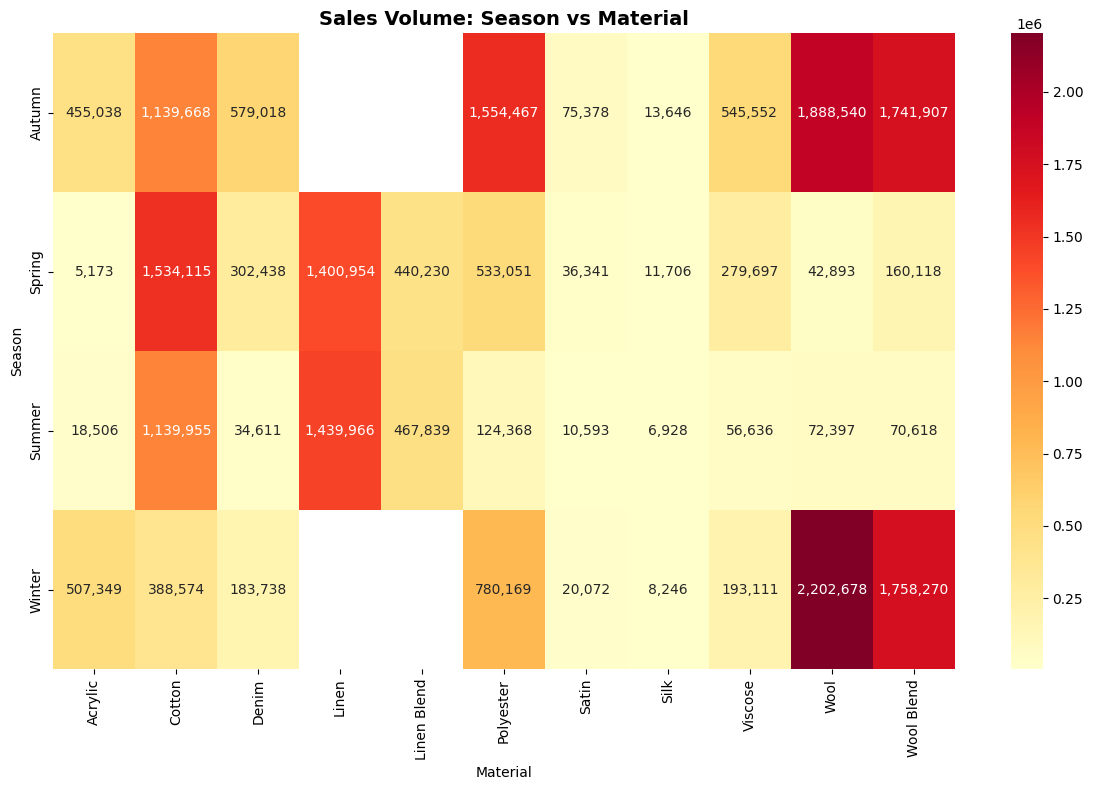

In [ ]:
df_pivot = df.groupby(["season", "material"]).agg({"sales_volume": "sum"}).unstack("material")
df_pivot.columns = df_pivot.columns.droplevel(0)

plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, annot=True, fmt=",.0f", cmap="YlOrRd")
plt.title("Sales Volume: Season vs Material", fontsize=14, fontweight="bold")
plt.xlabel("Material")
plt.ylabel("Season")
plt.tight_layout()
plt.show()

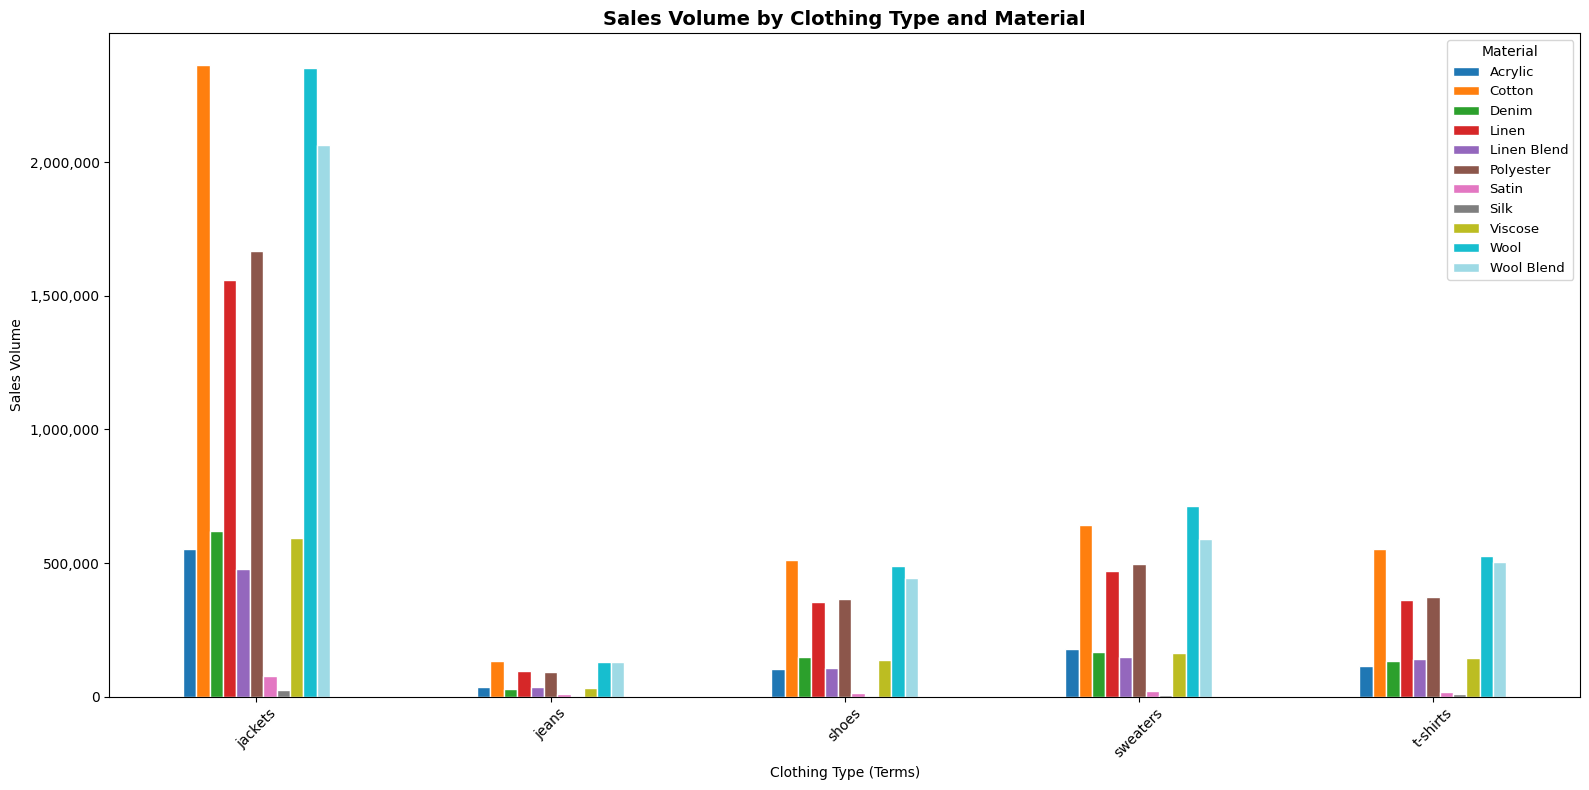

In [24]:
import matplotlib.pyplot as plt

df_group = df.groupby(["terms", "material"]).agg({"sales_volume": "sum"})
df_pivot = df_group.unstack("material")
df_pivot.columns = df_pivot.columns.droplevel(0)

ax = df_pivot.plot(kind="bar", stacked=False, figsize=(16, 8), colormap="tab20", edgecolor="white")

plt.title("Sales Volume by Clothing Type and Material", fontsize=14, fontweight="bold")
plt.xlabel("Clothing Type (Terms)")
plt.ylabel("Sales Volume")
plt.legend(title="Material", loc="upper right", fontsize=9.5)
ax.ticklabel_format(style='plain', axis='y')
ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

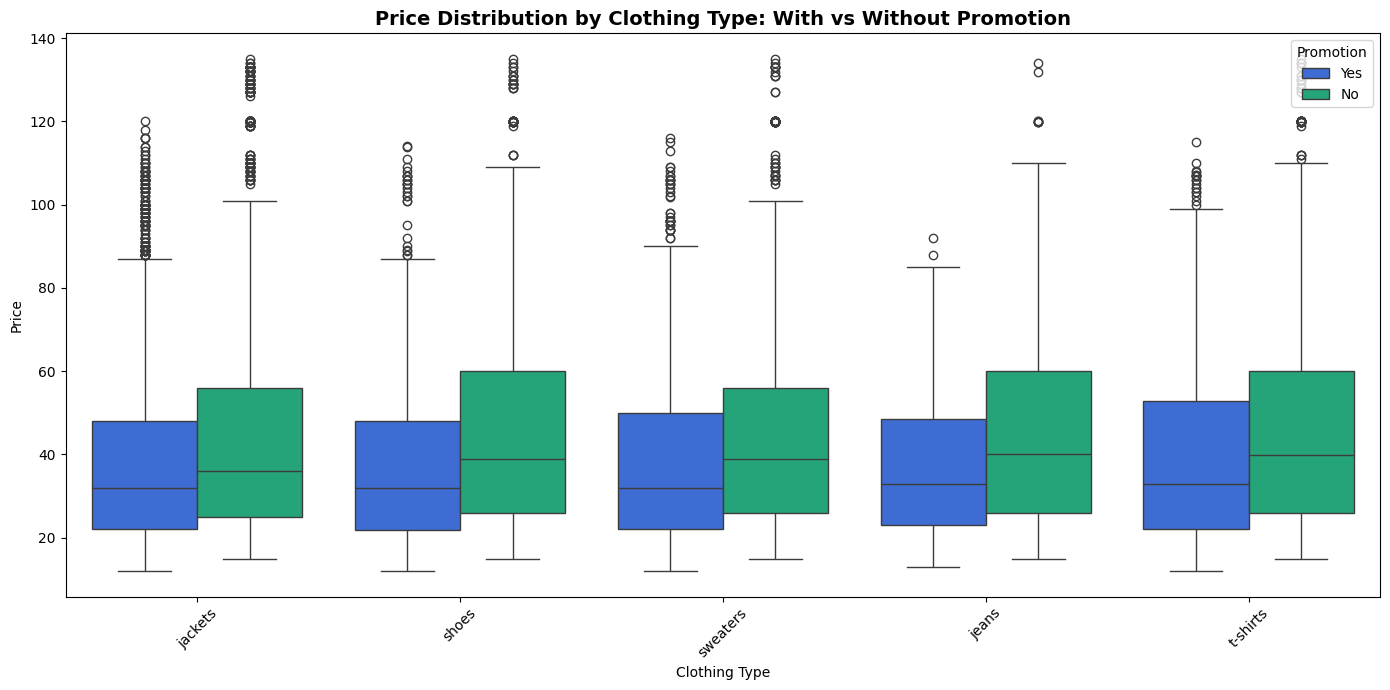

In [34]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x="terms", y="price", hue="promotion", palette=["#2563eb", "#10b981"])
plt.title("Price Distribution by Clothing Type: With vs Without Promotion", fontsize=14, fontweight="bold")
plt.xlabel("Clothing Type")
plt.ylabel("Price")
plt.legend(title="Promotion", loc="upper right")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

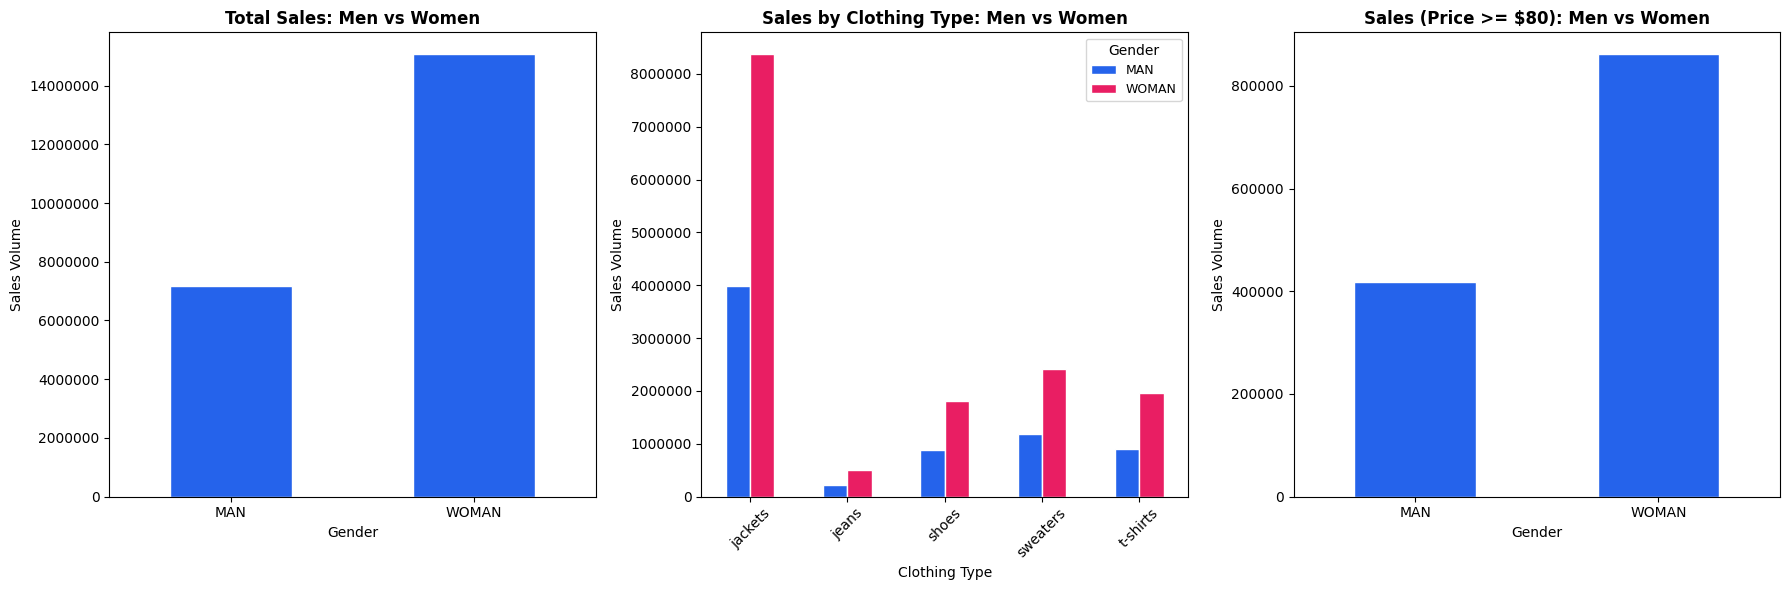

In [36]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Chart 1: Men vs Women in Total Sales
df_gender = df.groupby("section").agg({"sales_volume": "sum"})
df_gender.plot(kind="bar", ax=axes[0], color=["#2563eb", "#e91e63"], edgecolor="white", legend=False)
axes[0].set_title("Total Sales: Men vs Women", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Sales Volume")
axes[0].tick_params(axis='x', rotation=0)
axes[0].ticklabel_format(style='plain', axis='y')

# Chart 2: Men vs Women by Clothing Type
df_clothing = df.groupby(["terms", "section"]).agg({"sales_volume": "sum"}).unstack("section")
df_clothing.columns = df_clothing.columns.droplevel(0)
df_clothing.plot(kind="bar", ax=axes[1], color=["#2563eb", "#e91e63"], edgecolor="white")
axes[1].set_title("Sales by Clothing Type: Men vs Women", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Clothing Type")
axes[1].set_ylabel("Sales Volume")
axes[1].legend(title="Gender", loc="upper right", fontsize=9)
axes[1].tick_params(axis='x', rotation=45)
axes[1].ticklabel_format(style='plain', axis='y')

# Chart 3: Men vs Women for Price >= 80
df_high_price = df[df["price"] >= 80].groupby("section").agg({"sales_volume": "sum"})
df_high_price.plot(kind="bar", ax=axes[2], color=["#2563eb", "#e91e63"], edgecolor="white", legend=False)
axes[2].set_title("Sales (Price >= $80): Men vs Women", fontsize=12, fontweight="bold")
axes[2].set_xlabel("Gender")
axes[2].set_ylabel("Sales Volume")
axes[2].tick_params(axis='x', rotation=0)
axes[2].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()